# EDA OF TITANICDATASET

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read the dataset
df=pd.read_csv("C:/Users/SRIPRIYA/titanic.csv")

In [3]:
#Shape of the dataset
print("Shape of data is :",df.shape)

Shape of data is : (891, 12)


In [4]:
#Display the first 5 rows from the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Display the last 5 rows from the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Definitions of each features and quick thoughts:

PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). 
Name. Name of the passenger. We need to parse before using it.
Sex. Gender Categorical variable that should be encoded. We can use dummy -variable to encode it.
Age. Age in years.
SibSp. Siblings / Spouses aboard the Titanic.
Parch. Parents / Children aboard the Titanic.
Ticket. Ticket number. Big mess.
Fare. Passenger fare.
Cabin. Cabin number.
Embarked. Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. 




In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Reading the column 
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
#Renaming the column
df = df.rename(columns={'Sex':'Gender','SibSp':'Siblings','Parch':'Parents'})
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'Siblings', 'Parents', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Deleting Unnnecessary Columns
df=df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Gender,Age,Siblings,Parents,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Categorical and Numerical Variables 

Categorical Variable: Survived, Sex, Pclass (ordinal), Embarked, Cabin, SibSp, and Parch.
Numerical Variable: Fare, Age, and PassengerId.

# Variable Data Types 

In [10]:
#Displaying the Datatype of the dataset
print("Data Types of Our Variables:")
display(df.dtypes)

Data Types of Our Variables:


Survived      int64
Pclass        int64
Gender       object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

int data type variables: Pclass, SibSp, Parch, and PassengerId. float data type variables: Fare and Age, Survived (due to concatenation) object (numbers + strings) data type variables: Name, Sex, Ticket, Cabin, and Embarked.

# Handling missing vales

In [11]:
#Checking the null values 
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
Siblings      0
Parents       0
Fare          0
Cabin       687
Embarked      2
dtype: int64

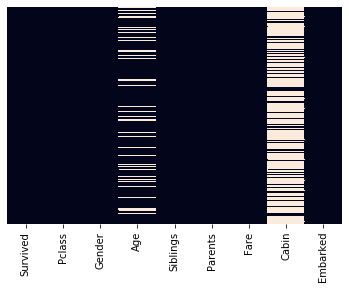

In [12]:
#Checking the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
#Drop the cabin column
df=df.drop(['Cabin'],axis=1)

In [14]:
#Filling the 'Age' column
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [15]:
#finding the most appeared value in embarked column
df['Embarked'].value_counts()
#s it is 
df['Embarked'].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

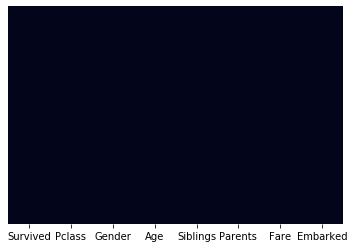

In [16]:
#Displaying the  heatmap after filling null value 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Gender      891 non-null object
Age         891 non-null float64
Siblings    891 non-null int64
Parents     891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# **changing** **data** **type**

In [18]:
#Chaning the datatype
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

# **univariate analysis**

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


out of 891 62.0 people died in the accident:


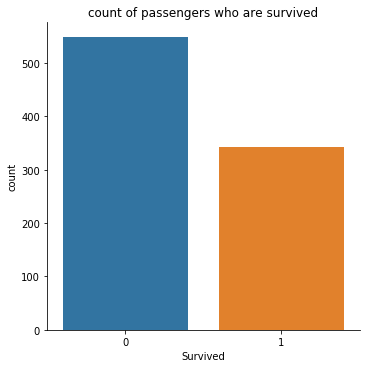

In [19]:
##survived column
sns.factorplot('Survived',data=df,kind='count')
plt.title('count of passengers who are survived')
death_per=round((df['Survived'].value_counts().values[0]/891)*100)
print('out of 891 {} people died in the accident:'.format(death_per))

male      64.758698
female    35.241302
Name: Gender, dtype: float64


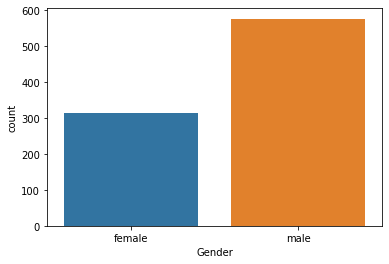

In [20]:
###Gender column
print(df['Gender'].value_counts()/891*100)
sns.countplot(df['Gender'])

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


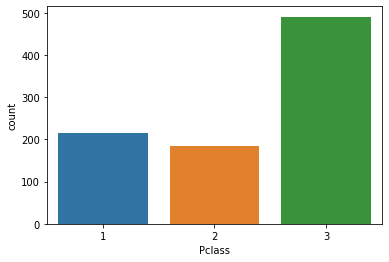

In [21]:
### Pclass column
print(df['Pclass'].value_counts()/891*100)
sns.countplot(df['Pclass'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parents, dtype: float64


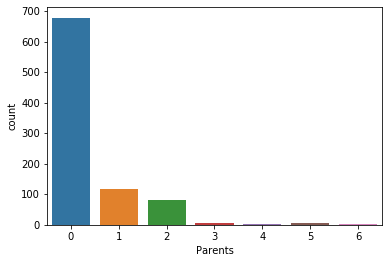

In [22]:
### Parents column
print(df['Parents'].value_counts()/891*100)
sns.countplot(df['Parents'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings, dtype: int64


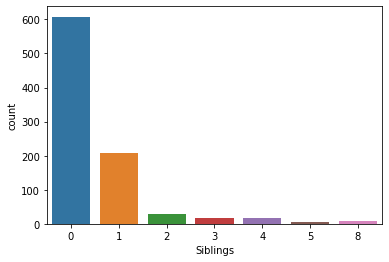

In [23]:
## Siblings column
print(df['Siblings'].value_counts())
sns.countplot(df['Siblings'])

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


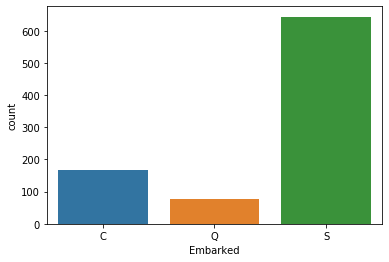

In [24]:
### Embarked column
print(df['Embarked'].value_counts()/891*100)
sns.countplot(df['Embarked'])

0.5473914801492362


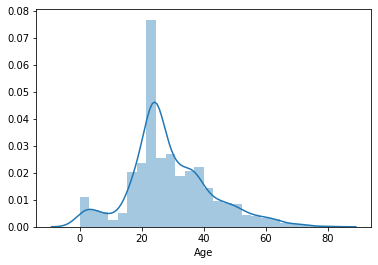

In [25]:
### Age column
sns.distplot(df['Age'])
print(df['Age'].skew())


In [26]:
print('People with age between 60 & 70 are:',df[(df['Age']>60) & (df['Age']<=70)].shape[0])
print('People with age greater than 70 & 75 are:',df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('People with age greater than 75 are:',df[(df['Age']>75)].shape[0])


People with age between 60 & 70 are: 18
People with age greater than 70 & 75 are: 6
People with age greater than 75 are: 1


In [27]:
#Stastical description for the  numerical dataset
df.describe()

,Age,Siblings,Parents,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.025814,0.523008,0.381594,32.204208
std,13.254484,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,26.000000,0.000000,0.000000,14.454200
75%,37.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [28]:
#Stastical description for the categorical dataset
df.Gender.describe()

count      891
unique       2
top       male
freq       577
Name: Gender, dtype: object

There are three aspects that usually catch my attention when I analyse descriptive statistics:
Min and max values: This can give us an idea about the range of values and is helpful to detect outliers. Mean and standard deviation: The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. Count: Give us a first perception about the volume of missing data.





# Detecting outliers

In [29]:
#Sorting for 'Age' column
np.sort(df['Age'])

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 11, 11, 11, 11,
       12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22

In [30]:
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 75 percentile of the given data is, ', Q3) 
  
#Calculating IQR
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data is,  22.0
Q2 50 percentile of the given data is,  26.0
Q3 75 percentile of the given data is,  37.0
Interquartile range is 15.0


In [31]:
#Calculating the upper and lower limit
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is -0.5
up_limit is 59.5


In [32]:
outlier =[] 
for x in df['Age']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier) 

 outlier in the dataset is [66, 65, 71, 70, 61, 62, 63, 65, 61, 60, 64, 65, 63, 71, 64, 62, 62, 60, 61, 80, 70, 60, 60, 70, 62, 74]


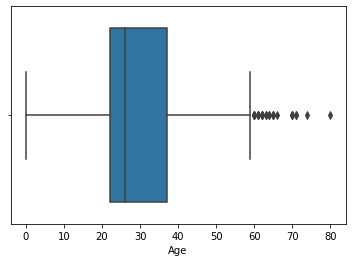

In [33]:
#Boxplot for the Age column
sns.boxplot(df['Age'])

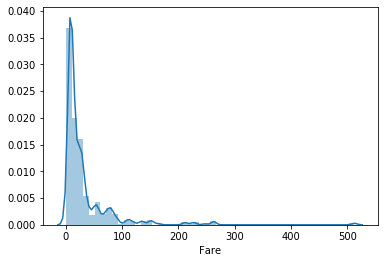

In [34]:
## Distribution plot for the Fare column
sns.distplot(df['Fare'])

In [35]:
print('People with fare in between $200 and $300 are:',df[(df['Fare']>200) & (df['Fare']<=300)].shape[0])
print('people with fare greater than $300:',df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 are: 17
people with fare greater than $300: 3


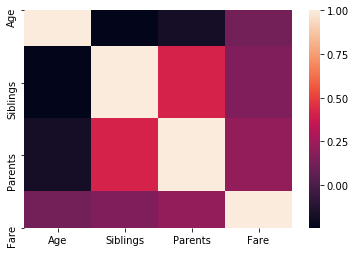

In [36]:
#Correlation of the features
sns.heatmap(df.corr())

# **bivariateanalysis**

Survived  Gender
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

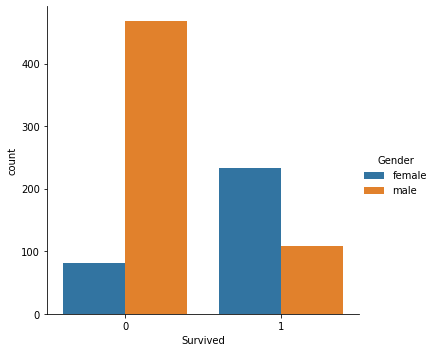

In [37]:
##survived with Gender
sns.catplot('Survived',hue='Gender', kind='count', data=df)
df.groupby(['Survived','Gender'])['Survived'].count()


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


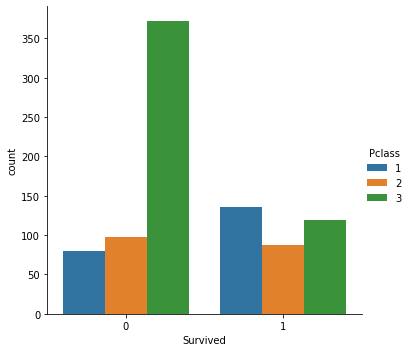

In [38]:
##Survived with Pclass
sns.catplot('Survived',hue='Pclass', kind='count', data=df)
pd.crosstab(df.Pclass, df.Survived, margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


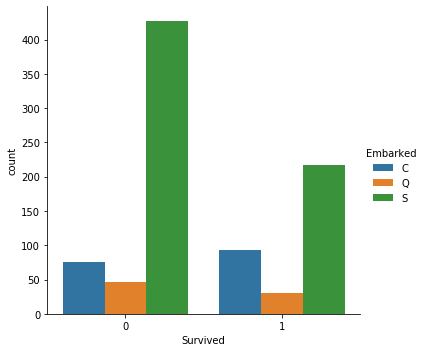

In [39]:
## Survived with Embarked
sns.catplot('Survived',hue='Embarked',kind='count',data=df)
pd.crosstab(df.Embarked, df.Survived, margins=True)

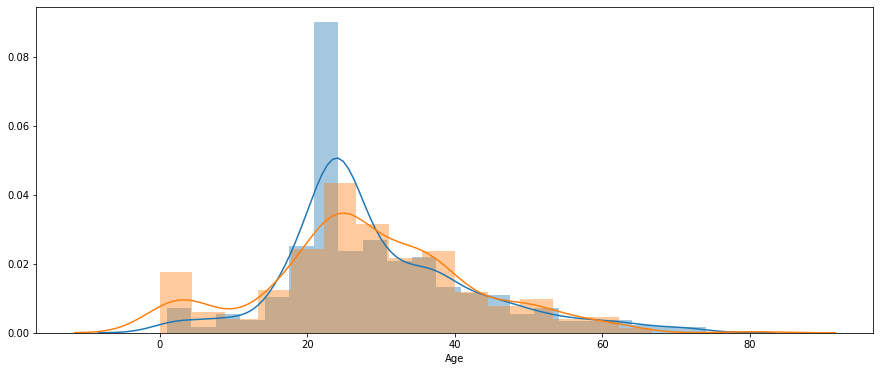

In [40]:
## Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

# **Feature** **Engineering**

In [41]:
#addind family feature
df['Family_size']=df['Siblings']+df['Parents']

In [42]:
#adding children feature
def child(passenger):
    age,gender=passenger
    if age<10:
        return'child'
    else:
        return gender
df['person']=df[['Age','Gender']].apply(child,axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived       891 non-null category
Pclass         891 non-null category
Gender         891 non-null category
Age            891 non-null int32
Siblings       891 non-null int64
Parents        891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null category
Family_size    891 non-null int64
person         891 non-null object
dtypes: category(4), float64(1), int32(1), int64(3), object(1)
memory usage: 42.3+ KB


In [44]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

Embarked,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [45]:
gen=pd.get_dummies(df['Gender'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
psg_class=pd.get_dummies(df['Pclass'],drop_first=True)

In [46]:
df.drop(['Embarked','Gender','person','Pclass'],axis=1,inplace=True)

In [47]:
##concatenation
df=pd.concat([df,gen,embarked,psg_class],axis=1)

In [48]:
##final dataset
df

,Survived,Age,Siblings,Parents,Fare,Family_size,male,Q,S,2,3
0,0,22,1,0,7.2500,1,1,0,1,0,1
1,1,38,1,0,71.2833,1,0,0,0,0,0
2,1,26,0,0,7.9250,0,0,0,1,0,1
3,1,35,1,0,53.1000,1,0,0,1,0,0
4,0,35,0,0,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13.0000,0,1,0,1,1,0
887,1,19,0,0,30.0000,0,0,0,1,0,0
888,0,24,1,2,23.4500,3,0,0,1,0,1
889,1,26,0,0,30.0000,0,1,0,0,0,0


# Feature Selection

In [49]:
df.columns

Index([   'Survived',         'Age',    'Siblings',     'Parents',
              'Fare', 'Family_size',        'male',           'Q',
                 'S',             2,             3],
      dtype='object')

In [50]:
#Selecting x features
x=df.iloc[:,[1,2,3,4,6,7,8,9]]
x

,Age,Siblings,Parents,Fare,male,Q,S,2
0,22,1,0,7.2500,1,0,1,0
1,38,1,0,71.2833,0,0,0,0
2,26,0,0,7.9250,0,0,1,0
3,35,1,0,53.1000,0,0,1,0
4,35,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...
886,27,0,0,13.0000,1,0,1,1
887,19,0,0,30.0000,0,0,1,0
888,24,1,2,23.4500,0,0,1,0
889,26,0,0,30.0000,1,0,0,0


In [51]:
# target feature
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [52]:
#splitting dataset into the  Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
#print x_train data
print('x_train data')
x_train 

x_train data


,Age,Siblings,Parents,Fare,male,Q,S,2
105,28,0,0,7.8958,1,0,1,0
68,17,4,2,7.9250,0,0,1,0
253,30,1,0,16.1000,1,0,1,0
320,22,0,0,7.2500,1,0,1,0
706,45,0,0,13.5000,0,0,1,1
...,...,...,...,...,...,...,...,...
835,39,1,1,83.1583,0,0,0,0
192,19,1,0,7.8542,0,0,1,0
629,24,0,0,7.7333,1,1,0,0
559,36,1,0,17.4000,0,0,1,0


In [54]:
#print x_test data
print('x_test data')
x_test 


x_test data


,Age,Siblings,Parents,Fare,male,Q,S,2
495,24,0,0,14.4583,1,0,0,0
648,24,0,0,7.5500,1,0,1,0
278,7,4,1,29.1250,1,1,0,0
31,37,1,0,146.5208,0,0,0,0
255,29,0,2,15.2458,0,0,0,0
...,...,...,...,...,...,...,...,...
167,45,1,4,27.9000,0,0,1,0
306,37,0,0,110.8833,0,0,0,0
379,19,0,0,7.7750,1,0,1,0
742,21,2,2,262.3750,0,0,0,0


In [55]:
##print y_train data
print('y_train data')
y_train 

y_train data


105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: category
Categories (2, int64): [0, 1]

In [56]:
#print y_test data
print('y_test data')
y_test 

y_test data


495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: category
Categories (2, int64): [0, 1]

In [57]:
#model building
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)


C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#model running by using the test data
predictions=logmodel.predict(x_test)

#model running by using the test data
predictions=logmodel.predict(x_test)

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[116,  23],
       [ 26,  58]], dtype=int64)

In [61]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy


0.7802690582959642

In [62]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [63]:
##model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.72      0.69      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

